In [1]:
## Objective

what_we_do = {0: 'Data prep',
              1: 'Building model', 
             2: 'Training/fit model',
             3: 'Make preds/evals',
             5: 'saving loading',
             6: 'putting it all togather'}

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [3]:
# basic liner regression

weight = 0.7
bias = 0.3

x = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = weight * x + bias

In [4]:
y[:10], x[:10]

(tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]))

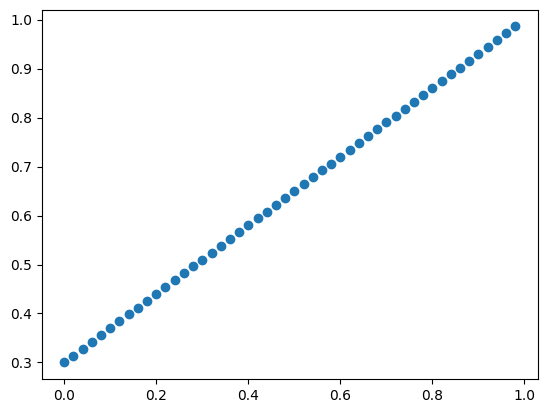

In [5]:
plt.scatter(x,y)

In [6]:
split_point = int((1 - 0.2) * len(x))

In [7]:
split_point

40

In [8]:
x_train, x_test = x[:split_point], x[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

In [9]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

(torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]))

## required_grad = True
it is for gradent decent and update parameter 

### Pytorch model building essentials

* torch.nn - contains all of the neural net
* torch.nn.Parameter - what parameters should our model try and learn.
* torch.nn.Module - The base class for all nn modules, should overwritte forward()
* torch.optim - optimizers
* torch.utils.data.Dataset - for torch already have dataset
* torch.utils.data.DataLoader - for dataloader.


In [10]:
class LinerReg(nn.Module):
    def __init__(self):
        super().__init__()
        self.w = nn.Parameter(torch.randn(1,
                                         dtype=torch.float))
        self.b = nn.Parameter(torch.randn(1,
                                         dtype=torch.float
                                         ))
        
    ## forward
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
            return self.w * x + self.b

In [11]:
torch.manual_seed(42)
mod = LinerReg()
list(mod.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [12]:
mod.state_dict()

OrderedDict([('w', tensor([0.3367])), ('b', tensor([0.1288]))])

## making prediction using `torch.inference_mode()`

To Check our model's preds

In [13]:
#Prediction using model

with torch.inference_mode(): # dosent add extra grad 
    y_preds = mod(x_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

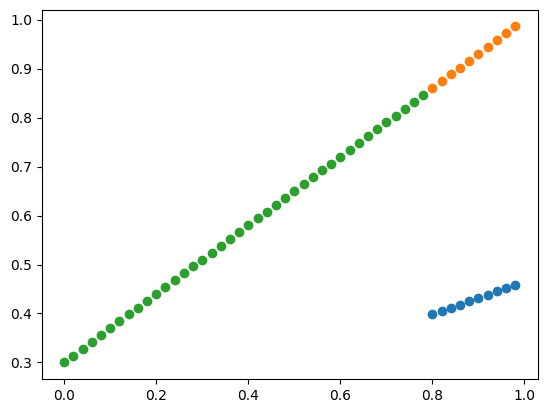

In [14]:
plt.scatter(x_test,y_preds)
plt.scatter(x_test, y_test)
plt.scatter(x_train, y_train)

#  Training

* loss fn
* optimizers

In [15]:
#loss
loss_fn = nn.L1Loss()

# optimizers
optimizer_fn = torch.optim.SGD(mod.parameters(), lr=0.001, momentum=0.6)

In [16]:
optimizer_fn, loss_fn

(SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.001
     maximize: False
     momentum: 0.6
     nesterov: False
     weight_decay: 0
 ),
 L1Loss())

In [17]:
epochs = 1000

epoch_c = []
train_loss_c = []
test_loss_c = []

for e in range(epochs):
    mod.train() # sets all gradent parameter active
    
    # 1. forward
    y_pred = mod(x_train)
    
    # 2. calc loss
    loss = loss_fn(y_train, y_pred)
    
    
    # 3. optimize
    optimizer_fn.zero_grad()
    
    # 4. backprop
    loss.backward()
    
    # 5. step optimize, perform gradient decdent
    optimizer_fn.step()
    
    mod.eval() # turn off gradient
    
    if e%100 == 0:
        with torch.inference_mode():
            
            y_pred =  mod(x_test)
            test_loss = loss_fn(y_test, y_pred)
            epoch_c.append(e)
            train_loss_c.append(loss.detach().numpy())
            test_loss_c.append(test_loss)
            print("Epoch:",e,"train loss:",loss,"test loss:",test_loss)


Epoch: 0 train loss: tensor(0.3129, grad_fn=<MeanBackward0>) test loss: tensor(0.4932)
Epoch: 100 train loss: tensor(0.0652, grad_fn=<MeanBackward0>) test loss: tensor(0.1821)
Epoch: 200 train loss: tensor(0.0418, grad_fn=<MeanBackward0>) test loss: tensor(0.1006)
Epoch: 300 train loss: tensor(0.0332, grad_fn=<MeanBackward0>) test loss: tensor(0.0773)
Epoch: 400 train loss: tensor(0.0246, grad_fn=<MeanBackward0>) test loss: tensor(0.0573)
Epoch: 500 train loss: tensor(0.0160, grad_fn=<MeanBackward0>) test loss: tensor(0.0372)
Epoch: 600 train loss: tensor(0.0074, grad_fn=<MeanBackward0>) test loss: tensor(0.0171)
Epoch: 700 train loss: tensor(0.0002, grad_fn=<MeanBackward0>) test loss: tensor(0.0011)
Epoch: 800 train loss: tensor(0.0002, grad_fn=<MeanBackward0>) test loss: tensor(0.0011)
Epoch: 900 train loss: tensor(0.0002, grad_fn=<MeanBackward0>) test loss: tensor(0.0011)


In [18]:
train_loss_c, test_loss_c, epoch_c

([array(0.31288138, dtype=float32),
  array(0.06524093, dtype=float32),
  array(0.04181075, dtype=float32),
  array(0.03316445, dtype=float32),
  array(0.02457873, dtype=float32),
  array(0.01599354, dtype=float32),
  array(0.00740745, dtype=float32),
  array(0.00023386, dtype=float32),
  array(0.00023334, dtype=float32),
  array(0.00023334, dtype=float32)],
 [tensor(0.4932),
  tensor(0.1821),
  tensor(0.1006),
  tensor(0.0773),
  tensor(0.0573),
  tensor(0.0372),
  tensor(0.0171),
  tensor(0.0011),
  tensor(0.0011),
  tensor(0.0011)],
 [0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

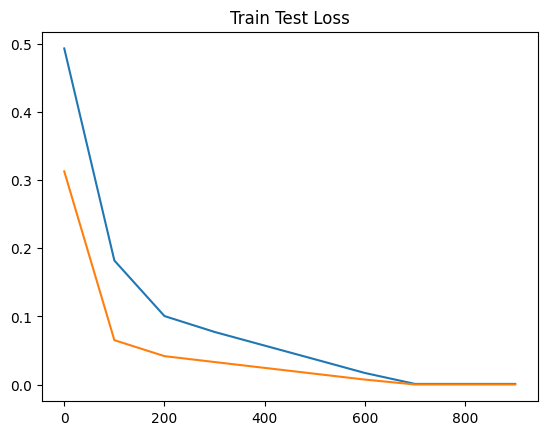

In [19]:
plt.plot(epoch_c, test_loss_c)
plt.plot(epoch_c, train_loss_c)
plt.title("Train Test Loss")
plt.show()

In [20]:
list(mod.parameters())

[Parameter containing:
 tensor([0.7006], requires_grad=True),
 Parameter containing:
 tensor([0.3000], requires_grad=True)]

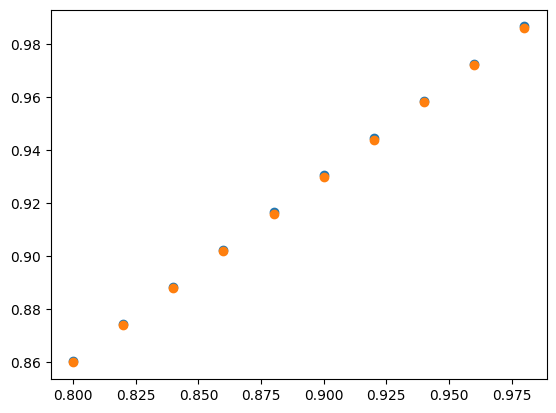

In [21]:
y_preds = mod.forward(x_test).detach().numpy()

plt.scatter(x_test,y_preds)
plt.scatter(x_test, y_test)

# saving a model in pytorch

1. torch.save() -> python pickle format
2. torch.load() -> load saved model
3. torch.nn.Module.load_state_dict() - load models save state dict


In [22]:
torch.save(mod.state_dict(),'test.pth') # saving dict - samller in size save dict state only

In [23]:
torch.save(mod,'test_mod.pth') # saving model - bigger in size contain more data

In [24]:
test_load_model = torch.load('./test.pth')

/tmp/ipykernel_11300/1201802626.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  test_load_model = torch.load('./test.pth')


In [25]:
test_load_model

OrderedDict([('w', tensor([0.7006])), ('b', tensor([0.3000]))])

In [26]:
# Method 2 to load saved model
test_load_model_by_state_dct = LinerReg()

In [27]:
test_load_model_by_state_dct.load_state_dict(torch.load('./test.pth'))

/tmp/ipykernel_11300/979757094.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  test_load_model_by_state_dct.load_state_dict(torch.load('./test.pth'))


<All keys matched successfully>

In [28]:
test_load_model_by_state_dct.state_dict()

OrderedDict([('w', tensor([0.7006])), ('b', tensor([0.3000]))])

In [29]:
test_load_model_by_state_dct.eval()
with torch.inference_mode():
    load_pred = test_load_model_by_state_dct(x_test)

print(load_pred, y_test)

tensor([[0.8605],
        [0.8745],
        [0.8885],
        [0.9025],
        [0.9165],
        [0.9305],
        [0.9445],
        [0.9586],
        [0.9726],
        [0.9866]]) tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


In [30]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(load_pred, y_test) # mse is less bitch

0.0005314529

## Putting it all togather

In [31]:


import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.5.1+cu121'

In [32]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [33]:
device

'cuda'

In [56]:
## data
w = 0.7
b = 0.3

start = 0
end = 1
step = 0.02

x = torch.arange(start, end , step).unsqueeze(dim=1)
y = w*x+b

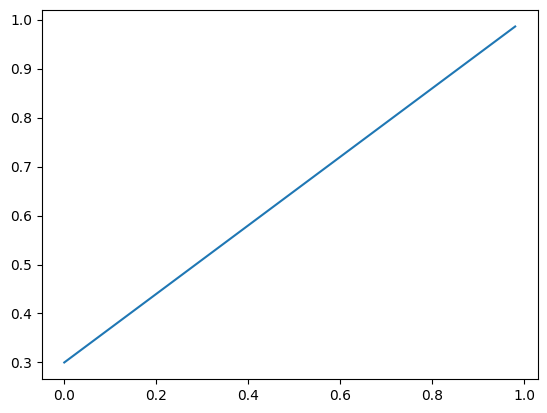

In [57]:
plt.plot(x,y)

In [58]:
split_point = 0.7

x_train , x_test = x[:int(len(x)*split_point)],x[int(len(x)*split_point):]
y_train , y_test = y[:int(len(y)*split_point)],x[int(len(y)*split_point):]

In [59]:
x_train.shape, x_test.shape, y_test.shape, y_train.shape

(torch.Size([35, 1]),
 torch.Size([15, 1]),
 torch.Size([15, 1]),
 torch.Size([35, 1]))

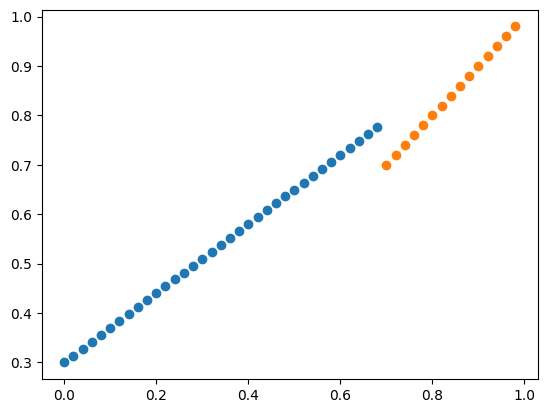

In [60]:
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)

In [61]:
## Building model

class NN2(nn.Module):
    def __init__(self):
        super().__init__()
        ## nn linear layer
        
        self.linear_layer = nn.Linear(in_features=1, 
                                      out_features=1)
        
    def forward(self, x) -> torch.Tensor:
        return self.linear_layer(x)

In [62]:
model2 = NN2()
model2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.8692]])),
             ('linear_layer.bias', tensor([0.1872]))])

In [63]:
## training

In [64]:
next(model2.parameters()).device # next use for iterator objects, like we use in linked list

device(type='cpu')

In [65]:
# Setrting device to cuda, computation on gpu
model2.to(device)

NN2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [66]:
next(model2.parameters()).device

device(type='cuda', index=0)

In [67]:
loss_fn = nn.L1Loss()
optim_fn = torch.optim.Adam(params=model2.parameters(), lr=0.001)

In [68]:
loss_fn, optim_fn

(L1Loss(),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.001
     maximize: False
     weight_decay: 0
 ))

In [69]:
## train loop

epochs = 1000

# putting data on device

x_train = x_train.to(device)
x_test = x_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model2.train()
    
    preds = model2(x_train)
    
    loss = loss_fn( preds, y_train)
    
    optim_fn.zero_grad()
    
    loss.backward()
    
    optim_fn.step()
    
    model2.eval()
    with torch.inference_mode():
        test_preds = model2(x_test)
        
        test_loss = loss_fn(test_preds, y_test)
        
    if epoch%100 == 0:
        print("epoch: {} | train loss: {} | test loss {}".format(epoch, loss, test_loss))

epoch: 0 | train loss: 0.055440448224544525 | test loss 0.0791240856051445
epoch: 100 | train loss: 0.024446090683341026 | test loss 0.10742121934890747
epoch: 200 | train loss: 0.005561451427638531 | test loss 0.06196705996990204
epoch: 300 | train loss: 0.00010998930520145223 | test loss 0.04853440448641777
epoch: 400 | train loss: 0.00012312446779105812 | test loss 0.048141200095415115
epoch: 500 | train loss: 0.00010583570838207379 | test loss 0.04812014475464821
epoch: 600 | train loss: 9.793553908821195e-05 | test loss 0.048110757023096085
epoch: 700 | train loss: 9.339622192783281e-05 | test loss 0.04810536280274391
epoch: 800 | train loss: 9.042109741130844e-05 | test loss 0.04810179024934769
epoch: 900 | train loss: 8.828384306980297e-05 | test loss 0.04809916391968727


In [86]:
model2.eval()
with torch.inference_mode():
    y_preds = model2(x_test)

In [95]:
y_preds.device, y_test.device

(device(type='cuda', index=0), device(type='cuda', index=0))

In [106]:
y_preds.cpu().squeeze(dim=1), y_test.cpu().squeeze(dim=1)

(tensor([0.7901, 0.8041, 0.8181, 0.8321, 0.8461, 0.8601, 0.8741, 0.8881, 0.9021,
         0.9161, 0.9301, 0.9441, 0.9581, 0.9721, 0.9861]),
 tensor([0.7000, 0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600,
         0.8800, 0.9000, 0.9200, 0.9400, 0.9600, 0.9800]))

In [96]:
## using numpy
mean_absolute_error(y_preds.cpu(), y_test.cpu())

0.048108578

In [110]:
MAE_loss_func = nn.L1Loss()
MAE_loss_func(y_preds.squeeze(dim=1), y_test.squeeze(dim=1))

tensor(0.0481, device='cuda:0')

In [48]:
model2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[1.3816]], device='cuda:0')),
             ('linear_layer.bias', tensor([-0.2336], device='cuda:0'))])

In [49]:
model2(y_test)

tensor([[0.8716],
        [0.8992],
        [0.9269],
        [0.9545],
        [0.9821],
        [1.0098],
        [1.0374],
        [1.0650],
        [1.0927],
        [1.1203]], device='cuda:0', grad_fn=<AddmmBackward0>)